In [1]:
## importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [80]:
## Load Dataset
df = pd.read_csv("D:/MUSIC N JOY/zIIT DELHI/Placement Project source/7.Customer_seg/dataset/customer_segmentation_data.csv")

## UNIVARIATE ANALYSIS

In [82]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [84]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None


In [102]:
# Encode 'gender' column numerically
encoder = LabelEncoder()
df['Gender_Encoded'] = encoder.fit_transform(df['gender'])

In [104]:
# Drop unnecessary columns for clustering
columns_for_clustering = ['age', 'income', 'spending_score', 'membership_years', 'Gender_Encoded']
df_cluster = df[columns_for_clustering]

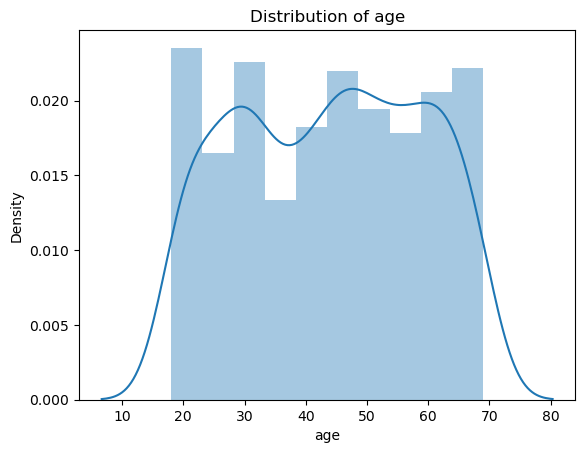

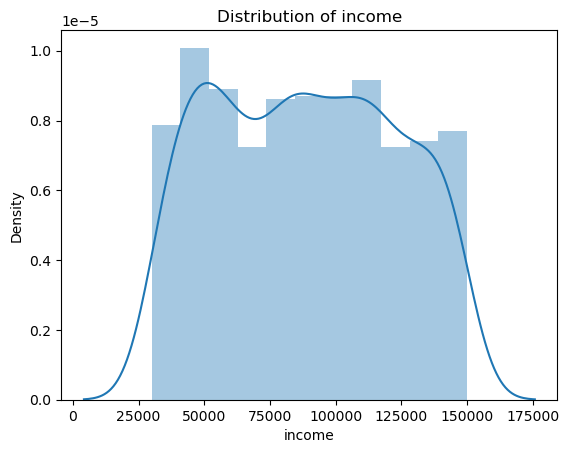

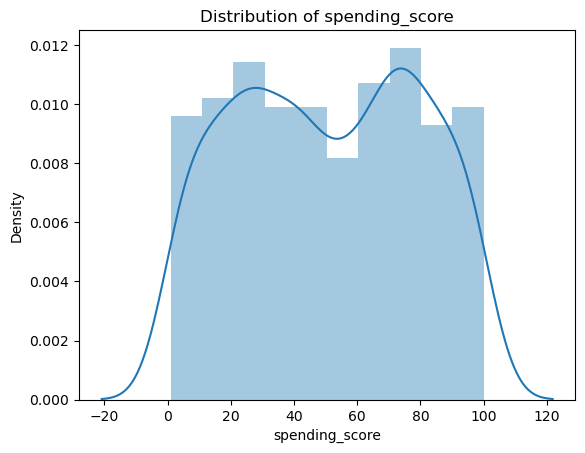

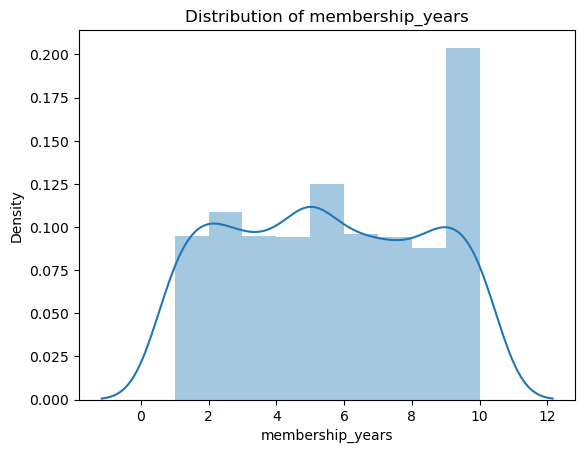

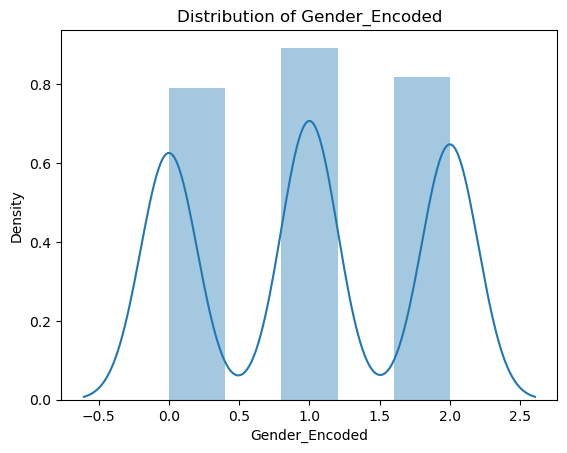

In [9]:
# Visualize distributions of clustering columns
for col in columns_for_clustering:
    plt.figure()
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

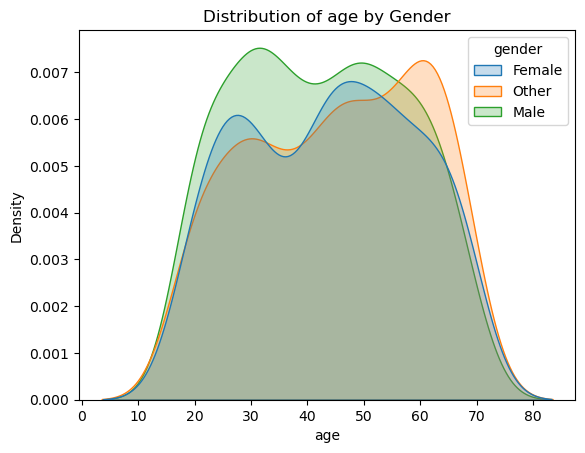

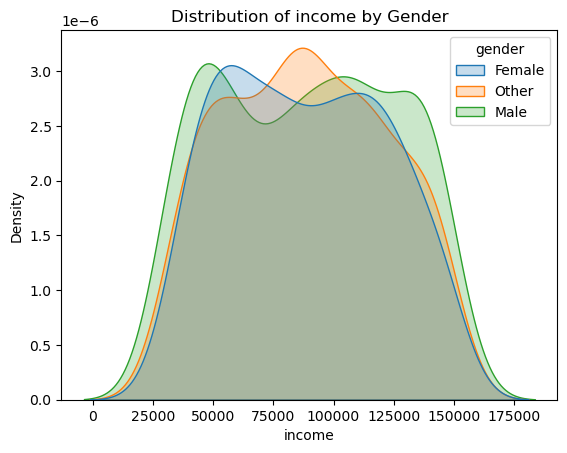

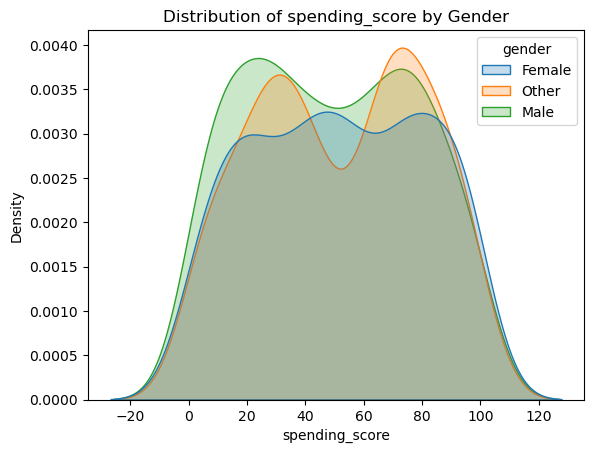

In [10]:
# KDE plots with Gender hue
for col in ['age', 'income', 'spending_score']:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='gender', shade=True)
    plt.title(f'Distribution of {col} by Gender')
    plt.show()

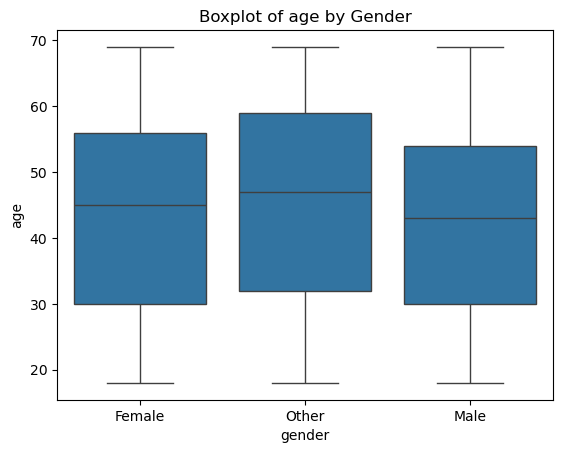

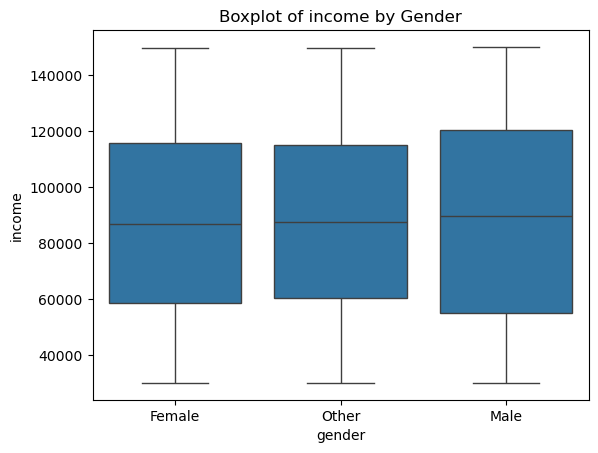

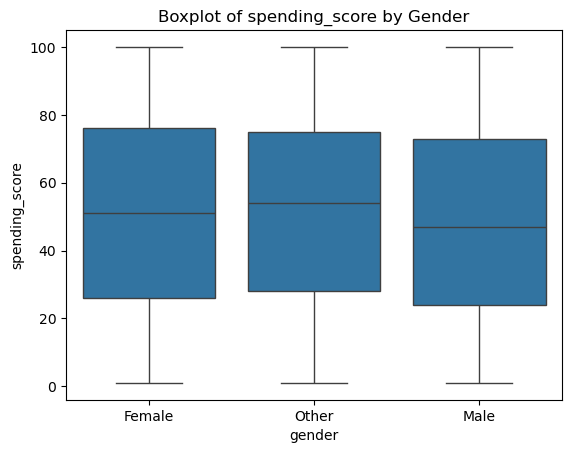

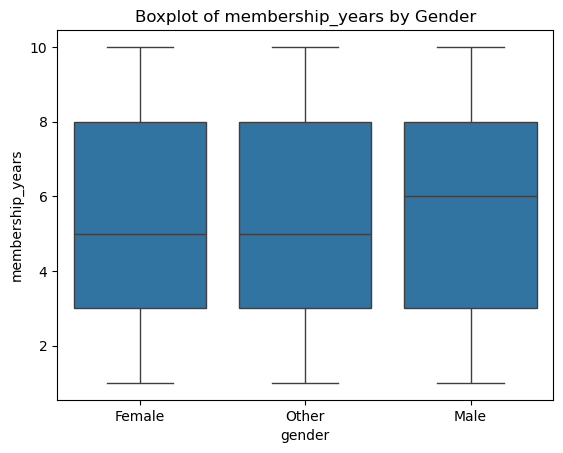

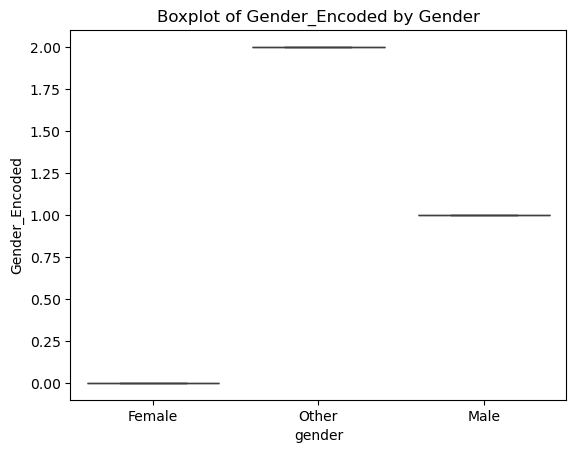

In [24]:
# Boxplots by Gender
for col in df_cluster:
    plt.figure()
    sns.boxplot(data=df, x='gender', y=col)
    plt.title(f'Boxplot of {col} by Gender')
    plt.show()

In [26]:
# Gender distribution
print(df['gender'].value_counts(normalize=True))

gender
Male      0.357
Other     0.327
Female    0.316
Name: proportion, dtype: float64


## BIVARIATE ANALYSIS

<Axes: xlabel='income', ylabel='spending_score'>

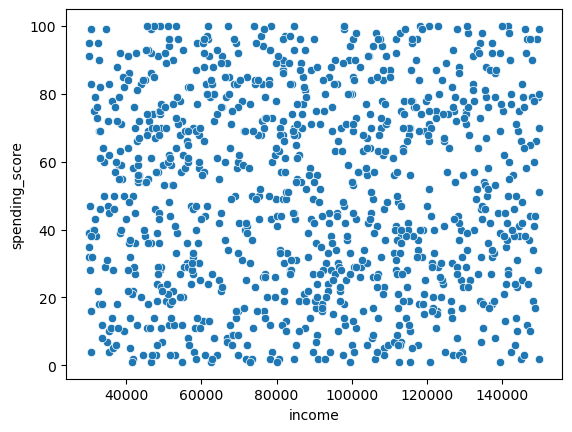

In [28]:
sns.scatterplot(data=df, x='income',y='spending_score' )

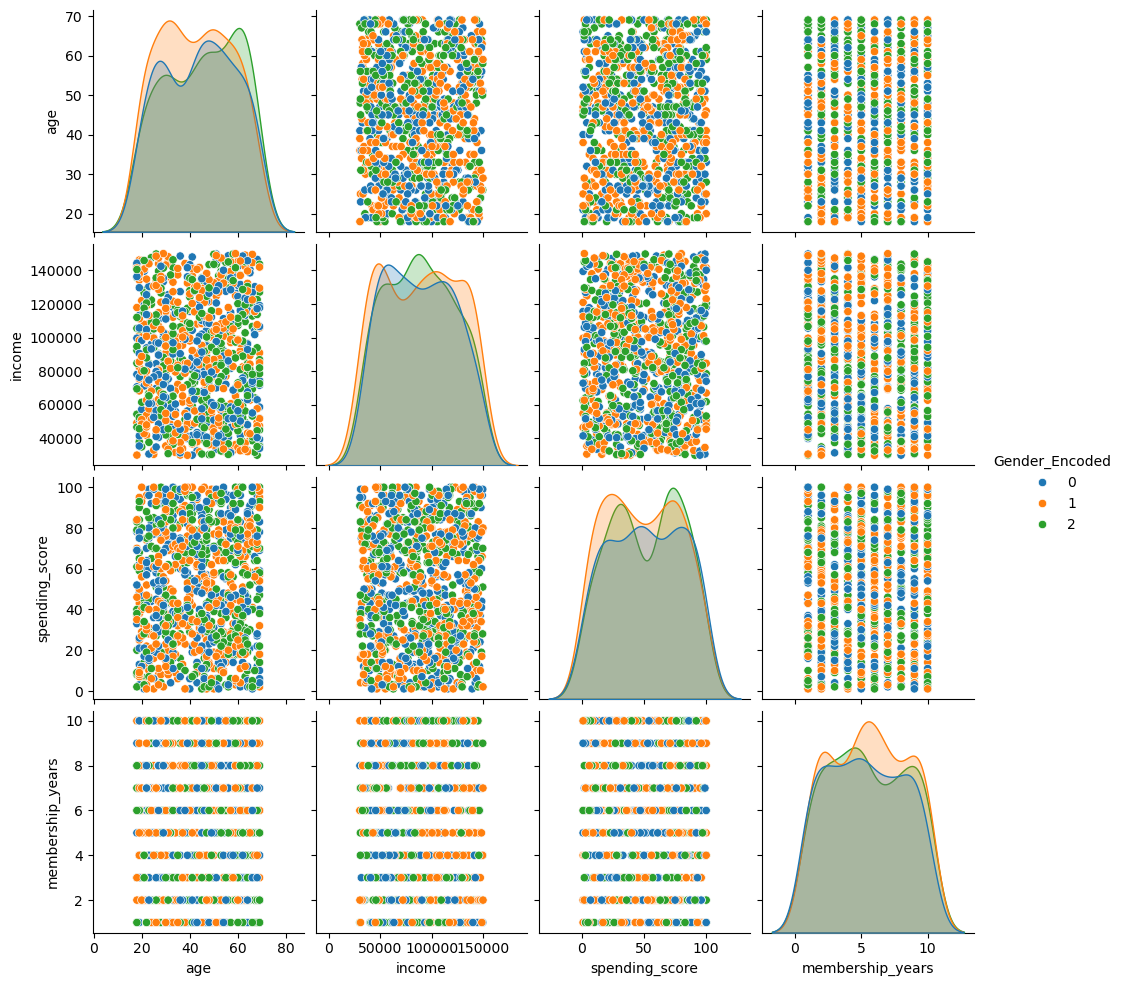

In [30]:
# Pairplot for clustering attributes
sns.pairplot(df_cluster, diag_kind="kde", hue='Gender_Encoded', palette="tab10")
plt.show()

In [32]:
df.groupby(['gender'])[['age', 'income',
       'spending_score']].mean()

,age,income,spending_score
gender,,,
Female,43.876582,88018.104430,51.696203
Male,42.434174,88907.997199,48.778711
Other,45.165138,88522.703364,51.788991


In [34]:
df_cluster.corr()

,age,income,spending_score,membership_years,Gender_Encoded
age,1.000000,-0.000688,0.017707,-0.003431,0.035039
income,-0.000688,1.000000,0.000020,-0.035783,0.005821
spending_score,0.017707,0.000020,1.000000,0.026726,0.001787
membership_years,-0.003431,-0.035783,0.026726,1.000000,0.027022
Gender_Encoded,0.035039,0.005821,0.001787,0.027022,1.000000


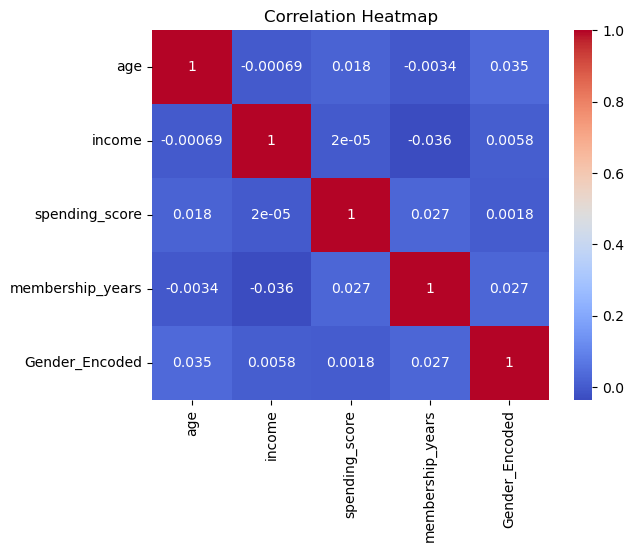

In [36]:
# Correlation heatmap
corr_matrix = df_cluster.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Clustering Analysis- Univariate, Bivariate, Multivariate

In [46]:
# Univariate Clustering
clustering1 = KMeans(n_clusters=3, random_state=42)
df['Income Cluster'] = clustering1.fit_predict(df[['income']])
print(df['Income Cluster'].value_counts())

Income Cluster
0    351
2    337
1    312
Name: count, dtype: int64


In [48]:
clustering1.labels_

array([2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2,
       1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2,

In [50]:
df.head()

,income,spending_score,Cluster,Income Cluster
0,99342,90,3,2
1,78852,60,2,2
2,126573,30,1,1
3,47099,74,2,0
4,140621,21,1,1


In [52]:
df['Income Cluster'].value_counts()

Income Cluster
0    351
2    337
1    312
Name: count, dtype: int64

In [54]:
clustering1.inertia_

130570602268.91385

In [56]:
# Elbow method for univariate clustering (income)
inertia_univariate = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['income']])
    inertia_univariate.append(kmeans.inertia_)

In [58]:
inertia_univariate

[1170573945947.9998,
 300631178815.11475,
 130570602268.91385,
 73476136802.8269,
 47426378616.06099,
 33845260515.957966,
 25565625822.26107,
 18665907536.37943,
 15127983753.88849,
 11791120750.915413]

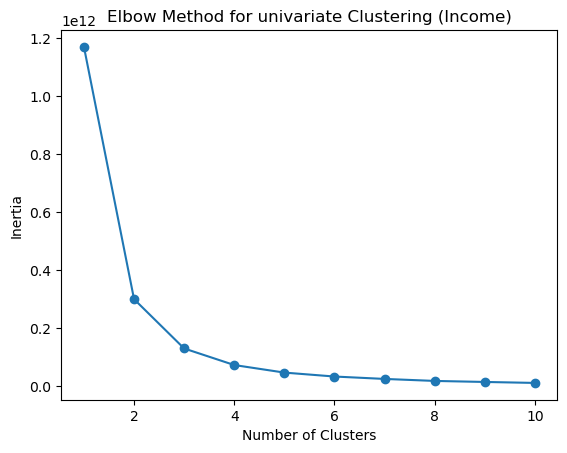

In [60]:
plt.figure()
plt.plot(range(1, 11), inertia_univariate, marker='o')
plt.title('Elbow Method for univariate Clustering (Income)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Bivariate Clustering

In [70]:
# Elbow method for bivariate clustering (spending_score vs income)
df2 = df[['income', 'spending_score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

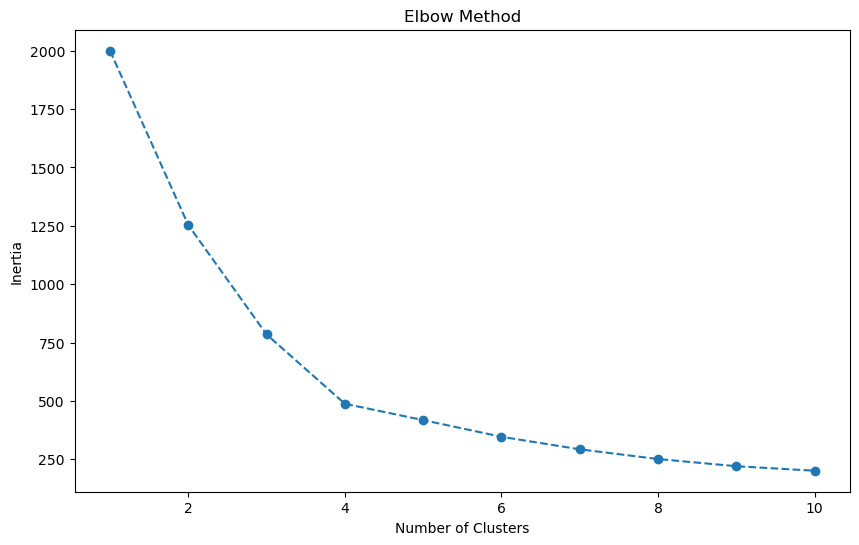

In [72]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [74]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering2 = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Clustering2'] = clustering2

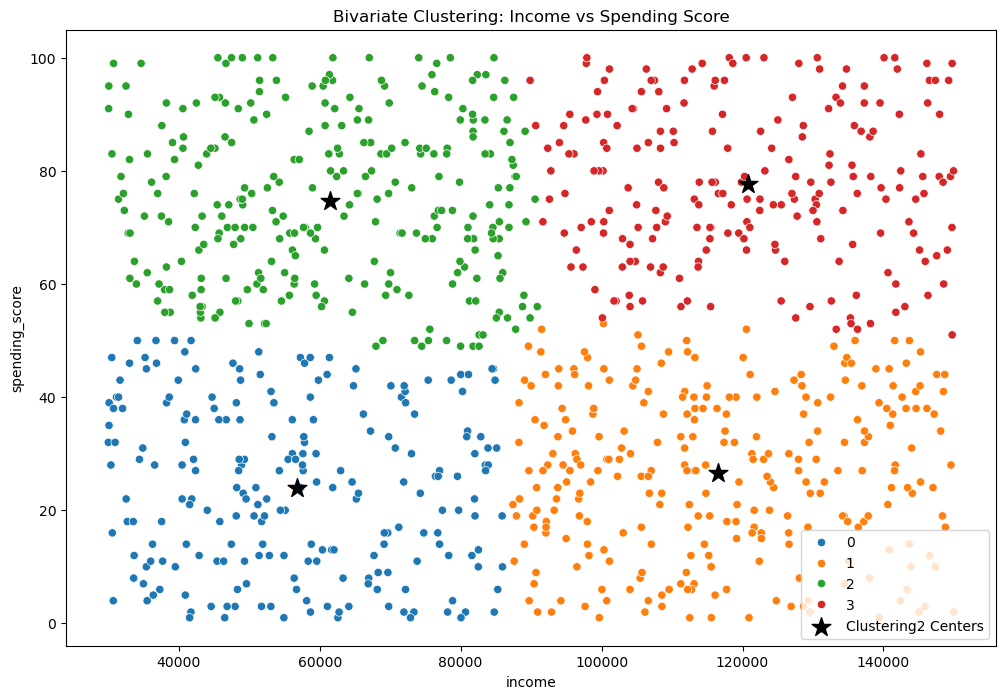

In [76]:
# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='income', y='spending_score', hue='Clustering2', palette='tab10')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0] * scaler.scale_[0] + scaler.mean_[0], centers[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            c='black', s=200, marker='*', label='Clustering2 Centers')
plt.title('Bivariate Clustering: Income vs Spending Score')
plt.legend()
plt.show()

In [ ]:
## Verification of clusters

In [86]:
X2 = df2.values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Use 4 clusters or your chosen number
kmeans.fit(X2)

KMeans(n_clusters=4, random_state=42)

In [88]:
from sklearn.metrics import silhouette_score
silhouette2 = silhouette_score(X2, kmeans.labels_)
print("Silhouette Score:", silhouette2)

Silhouette Score: 0.581317968177746


In [90]:
df['Spending and Income Cluster'] = kmeans.labels_
cluster_summary2 = df.groupby('Spending and Income Cluster')[['income', 'spending_score']].mean()
print(cluster_summary2)

                                    income  spending_score
Spending and Income Cluster                               
0                             78824.204000       51.788000
1                            136256.076923       51.668269
2                            107548.322581       48.891129
3                             46875.853741       50.564626


In [94]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    silhouette = silhouette_score(X2, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {silhouette}")

Silhouette Score for 2 clusters: 0.6194687673200697
Silhouette Score for 3 clusters: 0.5927650461471989
Silhouette Score for 4 clusters: 0.581317968177746
Silhouette Score for 5 clusters: 0.5622652375219716


In [96]:
#mulivariate clustering 
scale = StandardScaler()

In [98]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Spending and Income Cluster
0,1,38,Female,99342,90,3,24,Groceries,113.53,2
1,2,21,Female,78852,60,2,42,Sports,41.93,0
2,3,60,Female,126573,30,2,28,Clothing,424.36,1
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,3
4,5,65,Female,140621,21,3,25,Electronics,347.08,1


In [106]:
dff = pd.get_dummies(df[['Gender_Encoded', 'age', 'purchase_frequency']],drop_first=True)
dff.head()

,Gender_Encoded,age,purchase_frequency
0,0,38,24
1,0,21,42
2,0,60,28
3,2,40,5
4,0,65,25


In [108]:
dff_final = pd.concat([df[['income', 'spending_score']], dff], axis=1)

In [110]:
dff_finalscaled = scale.fit_transform(dff_final)

In [112]:
# Elbow Method for Multivariate Clustering
inertia_multivariate = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff_finalscaled)
    inertia_multivariate.append(kmeans3.inertia_)

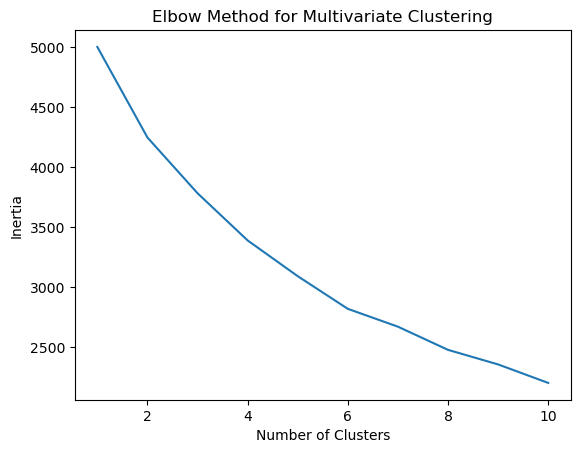

In [113]:
plt.plot(range(1, 11), inertia_multivariate)
plt.title('Elbow Method for Multivariate Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [116]:
clustering3 = KMeans(n_clusters=6)
clustering3.fit(dff_finalscaled)
df['Multivariate_Cluster'] = clustering3.labels_

In [126]:
## Verification of clusters
X3 = dff_final.values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Use 5 clusters or your chosen number
kmeans.fit(X3)

KMeans(n_clusters=5, random_state=42)

In [128]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X3, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5622547846506909


In [130]:
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X3)
    silhouette = silhouette_score(X3, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {silhouette}")

Silhouette Score for 2 clusters: 0.6194670264600275
Silhouette Score for 3 clusters: 0.5927611267063726
Silhouette Score for 4 clusters: 0.5813112788651495
Silhouette Score for 5 clusters: 0.5622547846506909
Silhouette Score for 6 clusters: 0.55100960507338
Silhouette Score for 7 clusters: 0.537860275174306
Silhouette Score for 8 clusters: 0.5444804369907935


In [ ]:
## Visualization of multivariate clustering

In [132]:
from sklearn.decomposition import PCA

In [134]:
# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dff_finalscaled)

In [136]:
# Create a DataFrame with the PCA components
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

In [138]:
# Add the cluster labels to the PCA DataFrame
df_pca_df['Cluster'] = df['Multivariate_Cluster']

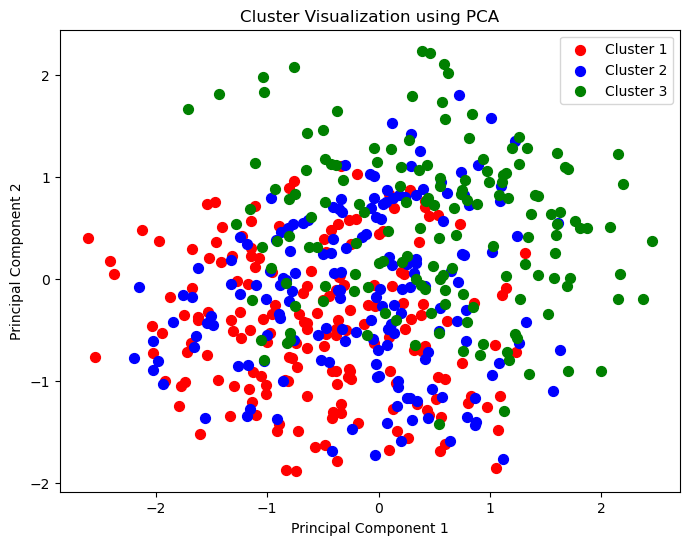

In [140]:
# Plotting the clusters with explicit labels for each cluster
plt.figure(figsize=(8, 6))

# Cluster 1
plt.scatter(df_pca_df[df_pca_df['Cluster'] == 0]['PCA1'], df_pca_df[df_pca_df['Cluster'] == 0]['PCA2'], s=50, label='Cluster 1', c='red')

# Cluster 2
plt.scatter(df_pca_df[df_pca_df['Cluster'] == 1]['PCA1'], df_pca_df[df_pca_df['Cluster'] == 1]['PCA2'], s=50, label='Cluster 2', c='blue')

# Cluster 3
plt.scatter(df_pca_df[df_pca_df['Cluster'] == 2]['PCA1'], df_pca_df[df_pca_df['Cluster'] == 2]['PCA2'], s=50, label='Cluster 3', c='green')

# Customize plot with title, labels, and legend
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()  # This will work now as the scatter points have labels
plt.show()
